In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [68]:
df=pd.read_csv('placement_data.csv')
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


<Axes: xlabel='CGPA', ylabel='IQ'>

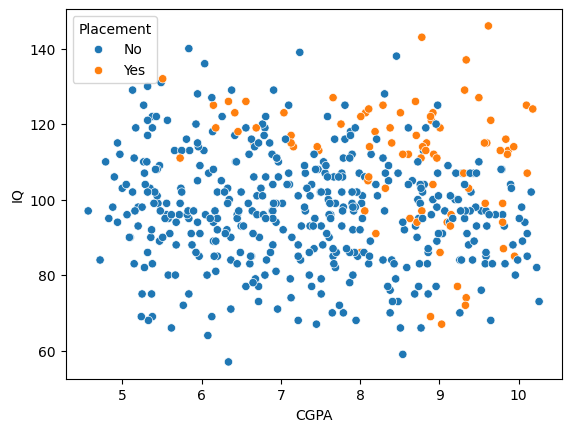

In [69]:
sns.scatterplot(df.sample(500),x='CGPA',y='IQ',hue=df['Placement'])

<Axes: xlabel='Communication_Skills', ylabel='Count'>

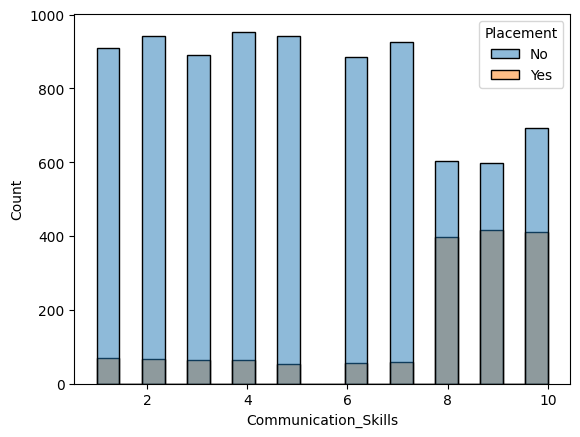

In [70]:
sns.histplot(df,x='Communication_Skills',hue=df['Placement'])

<Axes: xlabel='Extra_Curricular_Score', ylabel='Count'>

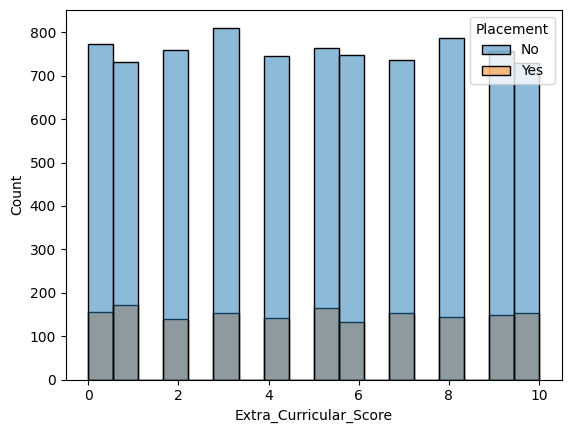

In [71]:
sns.histplot(df,x='Extra_Curricular_Score',hue=df['Placement'])

In [72]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['College_ID','Placement']),df['Placement'],test_size=0.2,random_state=42)

In [75]:
trf1= ColumnTransformer(transformers=[
    ('ohe_internship_experience',OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[4])
],remainder='passthrough')

In [76]:
trf2= DecisionTreeClassifier()

### Creating pipeline

In [77]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [78]:
pipe.fit(x_train,y_train)

,steps,"[('trf1', ...), ('trf2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe_internship_experience', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [79]:
y_pred=pipe.predict(x_test)

In [80]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [81]:
np.unique(y_pred,return_counts=True)

(array(['No', 'Yes'], dtype=object), array([1674,  326]))

In [82]:
y_test.value_counts()

Placement
No     1674
Yes     326
Name: count, dtype: int64

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0